# Convolutional Neural Network

problem statement :

 We need to identify the digit in given images. We have total 70,000 images, out of which 49,000 are part of train images with the label of digit and rest 21,000 images are unlabeled (known as test images). Now, We need to identify the digit for test images. Public and Private split for test images are 40:60 and evaluation metric of this challenge is accuracy
    https://drive.google.com/open?id=1-TavdjU2ohg5T6ZN1KUiWE9BNWu9_vhi


In [1]:
#importing necessary library
#importing matplotlib 
import matplotlib.pyplot as plt
#importing seaborn
import seaborn as sea
#importing pandas 
import pandas as pd
#importing numpy
import numpy as np

# importing my custom library file methods
import sys
sys.path.append('/home/admin3/ml_with_phoenix/deep_learning/lib_and_pkl_files/')
from ipynb.fs.full.library import *

#importing job-lib
import joblib

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

import warnings
warnings.filterwarnings('ignore')


/home/admin3/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/admin3/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/admin3/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/admin3/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

#### Making CNN model 

In [2]:
classifier = Sequential()
classifier.add(Convolution2D(32,3,3,input_shape=(64,64,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Convolution2D(32,3,3,input_shape=(64,64,3),activation = 'relu'))
classifier.add(Flatten())

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [3]:
classifier.add(Dense(units=32,activation='relu'))
classifier.add(Dense(units=20,activation='relu'))
classifier.add(Dense(units=10,activation='sigmoid'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#### Generating computational array from Image data from directory

In [4]:
from keras_preprocessing.image import ImageDataGenerator
train_data_generator = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_data_generator =ImageDataGenerator(rescale=1./255)

#### appending path of  train and test images 

In [5]:
class_train=pd.read_csv("/home/admin3/Documents/MyDoc/data_sets/Identify-numbers/Train_UQcUa52/train.csv")
class_test =pd.read_csv("/home/admin3/Documents/MyDoc/data_sets/Identify-numbers/Test_fCbTej3.csv")

In [6]:
path_of_train_image = "/home/admin3/Documents/MyDoc/data_sets/Identify-numbers/Train_UQcUa52/Images/train/"

In [7]:
def image_file_with_classes(path,data_set,column_name):
    return [path+image for image in data_set[column_name]]

In [8]:
class_train["full_path"]=image_file_with_classes(path_of_train_image,class_train,'filename')

In [9]:
class_train.drop(['filename'],axis=1,inplace=True)

In [10]:
class_train.head()

,label,full_path
0,4,/home/admin3/Documents/MyDoc/data_sets/Identif...
1,9,/home/admin3/Documents/MyDoc/data_sets/Identif...
2,1,/home/admin3/Documents/MyDoc/data_sets/Identif...
3,7,/home/admin3/Documents/MyDoc/data_sets/Identif...
4,3,/home/admin3/Documents/MyDoc/data_sets/Identif...


In [22]:
class_test["full_path"]=image_file_with_classes(path_of_test_image,class_test,'filename')

In [23]:
class_test.head()

,filename,full_path
0,49000.png,/home/admin3/Documents/MyDoc/data_sets/Identif...
1,49001.png,/home/admin3/Documents/MyDoc/data_sets/Identif...
2,49002.png,/home/admin3/Documents/MyDoc/data_sets/Identif...
3,49003.png,/home/admin3/Documents/MyDoc/data_sets/Identif...
4,49004.png,/home/admin3/Documents/MyDoc/data_sets/Identif...


In [12]:
class_train=class_train.astype(str)
class_test=class_test.astype(str)

#### Splitting train and test set

In [13]:
train_df = class_train[:37000]
test_df = class_train[37000:]
test_df =test_df.reset_index()

In [14]:
training_set = train_data_generator.flow_from_dataframe(dataframe=train_df,
                                                        x_col='full_path',
                                                        target_size=(64,64),
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        y_col='label')
test_set = train_data_generator.flow_from_dataframe(dataframe=test_df,
                                                        x_col='full_path',
                                                        target_size=(64,64),
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        y_col='label')

Found 37000 validated image filenames belonging to 10 classes.
Found 12000 validated image filenames belonging to 10 classes.


In [15]:
path_of_test_image = "/home/admin3/Documents/MyDoc/data_sets/Identify-numbers/Train_UQcUa52/Images/test/"
class_test["full_path"]=image_file_with_classes(path_of_test_image,class_test,'filename')

#### Fitting the model 

In [16]:
classifier.fit(training_set,epochs=10,batch_size=1,validation_data = test_set)

Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1157/1157 [==============================] - 53s 46ms/step - loss: 0.7822 - acc: 0.7090 - val_loss: 0.4418 - val_acc: 0.8562
Epoch 2/10
1157/1157 [==============================] - 54s 47ms/step - loss: 0.3710 - acc: 0.8773 - val_loss: 0.3562 - val_acc: 0.8847
Epoch 3/10
1157/1157 [==============================] - 61s 53ms/step - loss: 0.2970 - acc: 0.9018 - val_loss: 0.2949 - val_acc: 0.9067
Epoch 4/10
1157/1157 [==============================] - 72s 62ms/step - loss: 0.2521 - acc: 0.9196 - val_loss: 0.2664 - val_acc: 0.9182
Epoch 5/10
1157/1157 [==============================] - 56s 48ms/step - loss: 0.2211 - acc: 0.9302 - val_loss: 0.2390 - val_acc: 0.9267
Epoch 6/10
1157/1157 [==============================] - 53s 46ms/step - loss: 0.2040 - acc: 0.9358 - val_loss: 0.2359 - val_acc: 0.9325
Epoch 7/10
1157/1157 [==============================] - 53s 46ms/step - loss: 0.1929 - acc

#### predicting output based on model

In [17]:
from keras.preprocessing import image
def open_image_and_convert_into_array(data_set,index,flag=False,classifier=None):
    path =data_set["full_path"][index]
    img_plt = image.load_img(path,target_size=(64,64,1))
    img = image.img_to_array(img_plt)/255
    img = np.expand_dims(img,axis=0)
    if flag:
        print("digit in actual in image is :",data_set["label"][index])
        print("digit predicted by model in image is :",classifier.predict_classes(img))
        plt.imshow(img_plt)
        return img
    else:
        return img

Using TensorFlow backend.


#### Predicting digits in image 

digit in actual in image is : 8
digit predicted by model in image is : [8]


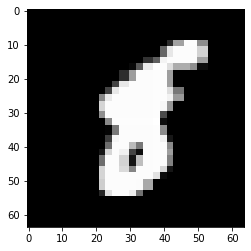

In [19]:
img_array=open_image_and_convert_into_array(class_train,111,True,classifier)

In [21]:
classifier.save('/home/admin3/ml_with_phoenix/deep_learning/lib_and_pkl_files/digits_cnn_classifier.h5')